In [1]:
#Импорты
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Создаем дф
df = pd.read_csv('finish_proj/ga_sessions.csv')
df.head()

C:\Users\vadme\AppData\Local\Temp\ipykernel_34792\2127612830.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('finish_proj/ga_sessions.csv')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [4]:
# Проверяем c чем связана ошибка
df.client_id.apply(type).value_counts()

client_id
<class 'float'>    1597898
<class 'str'>       262144
Name: count, dtype: int64

In [5]:
#Исправляем
df['client_id'] = df['client_id'].astype(str)

In [6]:
#Загружаем второй дф
df2 = pd.read_csv('finish_proj/ga_hits.csv')
df2.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [7]:
#Смотрим краткое инфо 
df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 1

In [ ]:
#Объединяем дф
df_merged = df.merge(df2, on='session_id', how='inner')
df_merged.head()

In [9]:
#Изучаем пропуски
print(round(df_merged.isnull().sum()/len(df2)*100,2))

session_id                   0.00
client_id                    0.00
visit_date                   0.00
visit_time                   0.00
visit_number                 0.00
utm_source                   0.00
utm_medium                   0.00
utm_campaign                13.98
utm_adcontent               18.01
utm_keyword                 58.53
device_category              0.00
device_os                   58.24
device_brand                25.09
device_model                98.96
device_screen_resolution     0.00
device_browser               0.00
geo_country                  0.00
geo_city                     0.00
hit_date                     0.00
hit_time                    58.25
hit_number                   0.00
hit_type                     0.00
hit_referer                 39.65
hit_page_path                0.00
event_category               0.00
event_action                 0.00
event_label                 23.70
event_value                 99.74
dtype: float64


In [10]:
#Удаляем колонки
df_merged.drop(['event_value','device_model','hit_type',"hit_time"], axis=1, inplace=True)
df_merged.describe

<bound method NDFrame.describe of                                          session_id           client_id  \
0         9055434745589932991.1637753792.1637753792  2108382700.1637757   
1         9055434745589932991.1637753792.1637753792  2108382700.1637757   
2          905544597018549464.1636867290.1636867290  210838531.16368672   
3         9055446045651783499.1640648526.1640648526   2108385331.164065   
4         9055446045651783499.1640648526.1640648526   2108385331.164065   
...                                             ...                 ...   
15685214  9055430416266113553.1640968742.1640968742  2108381692.1640968   
15685215  9055430416266113553.1640968742.1640968742  2108381692.1640968   
15685216  9055430416266113553.1640968742.1640968742  2108381692.1640968   
15685217  9055430416266113553.1640968742.1640968742  2108381692.1640968   
15685218  9055430416266113553.1640968742.1640968742  2108381692.1640968   

          visit_date visit_time  visit_number            utm_sour

In [17]:
#Работаем с пропусками
df_merged.fillna ({'utm_campaign':'unknown', 'utm_adcontent':'unknown', 'utm_keyword':'unknown', 'hit_referer':'unknown', 'event_label':'unknown'}, inplace=True)
df_merged['device_os'] = df_merged.groupby('device_category')['device_os'].transform(lambda x: x.fillna(x.mode()[0]))
df_merged['device_brand'] = df_merged.groupby('device_category')['device_brand'].transform(lambda x: x.fillna(x.mode()[0]))

In [23]:
#Проверяем пропуски
print(round(df_merged.isnull().sum()/len(df2)*100,2))

session_id                  0.0
client_id                   0.0
visit_date                  0.0
visit_time                  0.0
visit_number                0.0
utm_source                  0.0
utm_medium                  0.0
utm_campaign                0.0
utm_adcontent               0.0
utm_keyword                 0.0
device_category             0.0
device_os                   0.0
device_brand                0.0
device_screen_resolution    0.0
device_browser              0.0
geo_country                 0.0
geo_city                    0.0
hit_date                    0.0
hit_number                  0.0
hit_referer                 0.0
hit_page_path               0.0
event_category              0.0
event_action                0.0
event_label                 0.0
dtype: float64


In [25]:
#Удаляем дубликаты
df_merged.drop_duplicates(inplace=True) 

In [27]:
#Работа с типом данных
categorical_columns = [
    "device_category", "device_os", "event_category",
    "utm_medium", "device_browser", "geo_country", "device_brand",
    "utm_source", "utm_adcontent", "utm_campaign", "hit_number",
    "visit_number"]

for col in categorical_columns:
    df_merged[col] = df_merged[col].astype("category")

df_merged["visit_date"] = pd.to_datetime(df_merged["visit_date"])
df_merged["hit_date"] = pd.to_datetime(df_merged["hit_date"])

print(df_merged.dtypes)

session_id                          object
client_id                           object
visit_date                  datetime64[ns]
visit_time                          object
visit_number                      category
utm_source                        category
utm_medium                        category
utm_campaign                      category
utm_adcontent                     category
utm_keyword                         object
device_category                   category
device_os                         category
device_brand                      category
device_screen_resolution            object
device_browser                    category
geo_country                       category
geo_city                            object
hit_date                    datetime64[ns]
hit_number                        category
hit_referer                         object
hit_page_path                       object
event_category                    category
event_action                        object
event_label

In [37]:
# Сохраняем откоректированные данные
df_merged.to_csv('prep_db.csv')

In [3]:
df = pd.read_csv('prep_db.csv')
df.head()

,Unnamed: 0,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,...,device_browser,geo_country,geo_city,hit_date,hit_number,hit_referer,hit_page_path,event_category,event_action,event_label
0,0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,...,Chrome,Russia,Zlatoust,2021-11-24,3,unknown,podpiska.sberauto.com/,sub_page_view,sub_landing,unknown
1,1,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,...,Chrome,Russia,Zlatoust,2021-11-24,4,unknown,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,vodKSlUobUWTVlgsJqdI
2,2,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,...,Samsung Internet,Russia,Moscow,2021-11-14,3,unknown,podpiska.sberauto.com/,sub_page_view,sub_landing,unknown
3,3,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,...,Chrome,Russia,Krasnoyarsk,2021-12-28,10,unknown,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,KWTCzSIXzoqUWjfUQMgP
4,4,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,...,Chrome,Russia,Krasnoyarsk,2021-12-28,13,unknown,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,CBqnBQaKoQUyWJhLcxxN


## ГИПОТЕЗА: Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.

In [14]:
# Смотрим пути привлечения
print(list(df['utm_medium'].unique()))

['banner', 'cpm', 'cpc', 'organic', '(none)', 'referral', 'smm', 'stories', 'blogger_channel', 'blogger_stories', 'email', 'app', 'push', 'partner', 'tg', 'cpv', 'cpa', 'post', 'smartbanner', 'info_text', 'outlook', 'clicks', 'landing', 'blogger_header', 'qr', '(not set)', 'google_cpc', 'sms', 'article', 'vk_smm', 'static', 'cbaafe', 'Sbol_catalog', 'fb_smm', 'landing_interests', 'yandex_cpc', 'web_polka', 'ok_smm', 'linktest', 'sber_app', 'CPM', 'medium', 'tablet', 'promo_sbol', 'reach', 'dom_click', 'nkp', 'social', 'catalogue', 'main_polka', 'last', 'link', 'users_msk', 'qrcodevideo', 'promo_sber']


In [16]:
# Создаем новый признак, определяющий органический трафик 
df['is_organic'] = df.utm_medium.isin(['organic', '(none)', 'referral']).astype(int)
print(df.head())

   Unnamed: 0                                 session_id     client_id  \
0           0  9055434745589932991.1637753792.1637753792  2.108383e+09   
1           1  9055434745589932991.1637753792.1637753792  2.108383e+09   
2           2   905544597018549464.1636867290.1636867290  2.108385e+08   
3           3  9055446045651783499.1640648526.1640648526  2.108385e+09   
4           4  9055446045651783499.1640648526.1640648526  2.108385e+09   

  visit_date visit_time  visit_number            utm_source utm_medium  \
0 2021-11-24   14:36:32             1  ZpYIoDJMcFzVoPFsHGJL     banner   
1 2021-11-24   14:36:32             1  ZpYIoDJMcFzVoPFsHGJL     banner   
2 2021-11-14   08:21:30             1  MvfHsxITijuriZxsqZqt        cpm   
3 2021-12-28   02:42:06             1  ZpYIoDJMcFzVoPFsHGJL     banner   
4 2021-12-28   02:42:06             1  ZpYIoDJMcFzVoPFsHGJL     banner   

           utm_campaign         utm_adcontent  ... geo_country     geo_city  \
0  LEoPHuyFvzoNfnzGgfcd  vCIpmp

In [18]:
# Изучаем
print(df[df['is_organic'] == 1])

          Unnamed: 0                                 session_id     client_id  \
24                24  9055447192389856083.1622453074.1622453074  2.108386e+09   
25                25  9055447192389856083.1622453074.1622453074  2.108386e+09   
26                26  9055447192389856083.1622453074.1622453074  2.108386e+09   
27                27  9055447192389856083.1622453074.1622453074  2.108386e+09   
28                28  9055447192389856083.1622453074.1622453074  2.108386e+09   
...              ...                                        ...           ...   
15682874    15685199  9055422955903931195.1636979515.1636979515  2.108380e+09   
15682875    15685200  9055422955903931195.1636979515.1636979515  2.108380e+09   
15682876    15685201  9055422955903931195.1636979515.1636979515  2.108380e+09   
15682877    15685202  9055422955903931195.1636979515.1636979515  2.108380e+09   
15682878    15685203  9055422955903931195.1636979515.1636979515  2.108380e+09   

         visit_date visit_t

In [12]:
# Создаем новый признак, определяющий совершенное целевое действие
df['is_target'] = df.event_action.isin(['sub_car_claim_click', 'sub_car_claim_submit_click', 
'sub_open_dialog_click', 'sub_custom_question_submit_click', 
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 
'sub_car_request_submit_click']).astype(int)
print(df)

          Unnamed: 0                                 session_id     client_id  \
0                  0  9055434745589932991.1637753792.1637753792  2.108383e+09   
1                  1  9055434745589932991.1637753792.1637753792  2.108383e+09   
2                  2   905544597018549464.1636867290.1636867290  2.108385e+08   
3                  3  9055446045651783499.1640648526.1640648526  2.108385e+09   
4                  4  9055446045651783499.1640648526.1640648526  2.108385e+09   
...              ...                                        ...           ...   
15682889    15685214  9055430416266113553.1640968742.1640968742  2.108382e+09   
15682890    15685215  9055430416266113553.1640968742.1640968742  2.108382e+09   
15682891    15685216  9055430416266113553.1640968742.1640968742  2.108382e+09   
15682892    15685217  9055430416266113553.1640968742.1640968742  2.108382e+09   
15682893    15685218  9055430416266113553.1640968742.1640968742  2.108382e+09   

         visit_date visit_t

In [20]:
#Отделяем платный трафик от органического
paid = df[df['is_organic'] == 0]
org = df[df['is_organic'] == 1]
org.head()

,Unnamed: 0,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,...,geo_city,hit_date,hit_number,hit_referer,hit_page_path,event_category,event_action,event_label,is_organic,is_target
24,24,9055447192389856083.1622453074.1622453074,2.108386e+09,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,...,Saint Petersburg,2021-05-31,5,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_page_view,sub_landing,KclpemfoHstknWHFiLit,1,0
25,25,9055447192389856083.1622453074.1622453074,2.108386e+09,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,...,Saint Petersburg,2021-05-31,6,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,vodKSlUobUWTVlgsJqdI,1,0
26,26,9055447192389856083.1622453074.1622453074,2.108386e+09,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,...,Saint Petersburg,2021-05-31,25,HbolMJUevblAbkHClEQa,sberauto.com/cars/e1f862ea?rental_page=rental_car,card_web,view_card,KclpemfoHstknWHFiLit,1,0
27,27,9055447192389856083.1622453074.1622453074,2.108386e+09,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,...,Saint Petersburg,2021-05-31,27,HbolMJUevblAbkHClEQa,sberauto.com/cars/e1f862ea?rental_page=rental_car,card_web,view_card,KclpemfoHstknWHFiLit,1,0
28,28,9055447192389856083.1622453074.1622453074,2.108386e+09,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,...,Saint Petersburg,2021-05-31,34,HbolMJUevblAbkHClEQa,sberauto.com/cars/e1f862ea?rental_page=rental_car,card_web,view_card,KclpemfoHstknWHFiLit,1,0


In [23]:
# Общее количество уникальных сессий в платном и органическом трафике
quantity_paid = df.loc[df['is_organic']==0, 'session_id'].nunique()
quantity_org = df.loc[df['is_organic']==1, 'session_id'].nunique()

# Количество конверсий  в каждой группе
target_paid = df.loc[(df["is_organic"]==0) & (df["is_target"]==1), 'session_id'].nunique()
target_org = df.loc[(df["is_organic"]==1) & (df["is_target"]==1), 'session_id'].nunique()

# Расчет CR в процентах
CR_paid = target_paid / quantity_paid * 100
CR_org = target_org / quantity_org * 100


print(f'{round(CR_paid, 2)}% CR платной аудитории')
print(f'{round(CR_org, 2)}% CR органической аудитории')

2.34% CR платной аудитории
4.44% CR органической аудитории


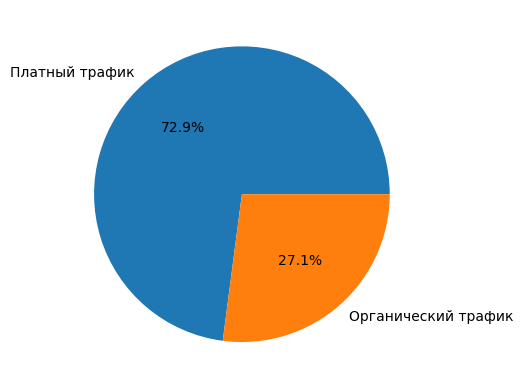

In [26]:
# Визуализируем 
labels = 'Платный трафик', 'Органический трафик'
sizes = [quantity_paid, quantity_org]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

In [28]:
# Выполняем Z-тест
from statsmodels.stats.proportion import proportions_ztest

counts= np.array([target_paid, target_org])
nobs = np.array([quantity_paid, quantity_org])

z_stat, p_value = proportions_ztest(counts, nobs, alternative='two-sided')

print(f'Z-статистика: {z_stat:.2f}')
print(f'P-значение: {p_value:.4f}')

Z-статистика: -73.23
P-значение: 0.0000


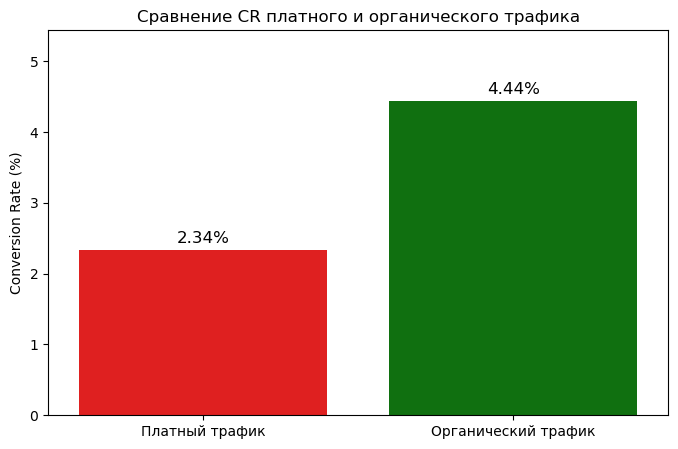

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Данные
categories = ['Платный трафик', 'Органический трафик']
values = [CR_paid, CR_org]

# Гистограмма
plt.figure(figsize=(8,5))
sns.barplot(x=categories, y=values, hue=categories, palette=["red", "green"], legend=False)
plt.ylabel("Conversion Rate (%)")
plt.title("Сравнение CR платного и органического трафика")
plt.ylim(0, max(values) + 1)

# Отображаем значения
for i, v in enumerate(values):
    plt.text(i, v + 0.1, f"{v:.2f}%", ha='center', fontsize=12)

plt.show()

### ГИПОТЕЗА опровергнута. 
Статистический тест показал значимое различие между CR платного и органического трафика (p-value < 0.05). Разница в коэффициенте конверсии достаточно существенна: органический трафик конвертируется почти в 2 раза лучше по сравнению с платным (4.44% против 2.34%). Это может говорить о том, что пользователи, приходящие через органический поиск, более заинтересованы в продукте и мотивированы к совершению целевого действия.

## ГИПОТЕЗА 2. Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.

In [38]:
# Создаем новый признак
df['is_desctop'] = df['device_category'].isin(['desktop']).astype(int)
df.head()

,Unnamed: 0,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,...,hit_date,hit_number,hit_referer,hit_page_path,event_category,event_action,event_label,is_organic,is_target,is_desctop
0,0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,...,2021-11-24,3,unknown,podpiska.sberauto.com/,sub_page_view,sub_landing,unknown,0,0,0
1,1,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,...,2021-11-24,4,unknown,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,vodKSlUobUWTVlgsJqdI,0,0,0
2,2,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,...,2021-11-14,3,unknown,podpiska.sberauto.com/,sub_page_view,sub_landing,unknown,0,0,0
3,3,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,...,2021-12-28,10,unknown,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,KWTCzSIXzoqUWjfUQMgP,0,0,0
4,4,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,...,2021-12-28,13,unknown,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,CBqnBQaKoQUyWJhLcxxN,0,0,0


In [40]:
# Общее количество уникальных сессий (пользователей) заходящих с пк и моб. устройств
quantity_deskt = df.loc[df['is_desctop']==1, 'session_id'].nunique()
quantity_mobile = df.loc[df['is_desctop']==0, 'session_id'].nunique()

# Количество конверсий (целевых действий) в каждой группе
target_deskt = df.loc[(df["is_desctop"]==1) & (df["is_target"]==1), 'session_id'].nunique()
target_mobile = df.loc[(df["is_desctop"]==0) & (df["is_target"]==1), 'session_id'].nunique()

# Расчет CR (конверсии) в процентах
CR_desctp = target_deskt / quantity_deskt * 100
CR_mobile = target_mobile / quantity_mobile * 100


print(f'{round(CR_desctp, 2)}% CR мобильного трафика')
print(f'{round(CR_mobile, 2)}% CR десктопного трафика')

3.32% CR мобильного трафика
2.8% CR десктопного трафика


In [42]:
# Выполняем Z-тест
counts= np.array([target_deskt, target_mobile])
nobs = np.array([quantity_deskt, quantity_mobile])

z_stat, p_value = proportions_ztest(counts, nobs, alternative='two-sided')

print(f'Z-статистика: {z_stat:.2f}')
print(f'P-значение: {p_value:.4f}')

Z-статистика: 16.25
P-значение: 0.0000


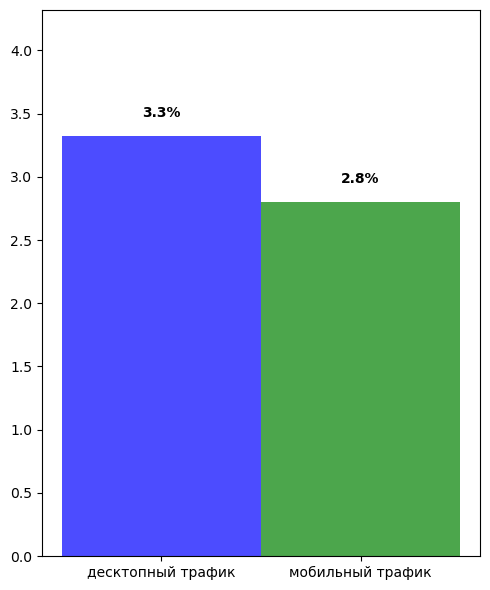

In [44]:

labels = ['десктопный трафик', 'мобильный трафик']
values = [CR_desctp, CR_mobile]


plt.figure(figsize=(5, 6))

# Рисуем столбцы
bars = plt.bar(labels, values, width=1.0, color=['blue', 'green'], alpha=0.7)  

# Увеличиваем границы оси Y, чтобы оставить место для подписей
plt.ylim(0, max(values) + 1)  # Добавляем отступ сверху

# Добавляем подписи над столбцами
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2  # Центр столбца
    y = bar.get_height()  # Высота столбца (значение CR)
    plt.text(x, y + 0.15, f"{y:.1f}%", ha='center', fontsize=10, fontweight='bold')  # Уменьшил шрифт и поднял текст

# Делаем график компактнее
plt.tight_layout()

# Отображаем график
plt.show()

## ГИПОТЕЗА 2 опровергнута. 
Разница между конверсией мобильных и десктопных пользователей статистически значима (p-value = 0.0000). Таким образом, мы отвергаем нулевую гипотезу и фиксируем, что мобильный трафик показывает более высокий CR (на 18.5%) по сравнению с десктопным.

## ГИПОТЕЗА 3. Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.

In [47]:
df['is_capital'] = df.geo_city.isin(['Moscow', 'Saint Petersburg']).astype(int)

In [52]:
# Общее количество уникальных сессий (пользователей) заходящих из МСК и СПБ
quantity_cap = df.loc[df['is_capital']==1, 'session_id'].nunique()
quantity_other = df.loc[df['is_capital']==0, 'session_id'].nunique()

# Количество конверсий (целевых действий) в каждой группе
target_cap = df.loc[(df["is_capital"]==1) & (df["is_target"]==1), 'session_id'].nunique()
target_other = df.loc[(df["is_capital"]==0) & (df["is_target"]==1), 'session_id'].nunique()

# Расчет CR (конверсии) в процентах
CR_cap = target_cap / quantity_cap * 100
CR_other = target_other / quantity_other * 100


print(f'{round(CR_cap, 2)}% CR столичного трафика')
print(f'{round(CR_other, 2)}% CR трафика из других регионов')

2.99% CR столичного трафика
2.78% CR трафика из других регионов


In [55]:
# Выполняем Z-тест
counts= np.array([target_cap, target_other])
nobs = np.array([quantity_cap, quantity_other])

z_stat, p_value = proportions_ztest(counts, nobs, alternative='two-sided')

print(f'Z-статистика: {z_stat:.2f}')
print(f'P-значение: {p_value:.4f}')

Z-статистика: 7.78
P-значение: 0.0000


In [57]:
# Проведем дополнительный Χ²-тест
from scipy.stats import chi2_contingency

contingency_table = [[target_cap, quantity_cap - target_cap],  # Столичный трафик
                     [target_other, quantity_other - target_other]]  # Остальные регионы

# Вычисляем p-value
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Вывод статистического результата
print(f"\nΧ²-тест: p-value = {p_value:.5f}")


Χ²-тест: p-value = 0.00000


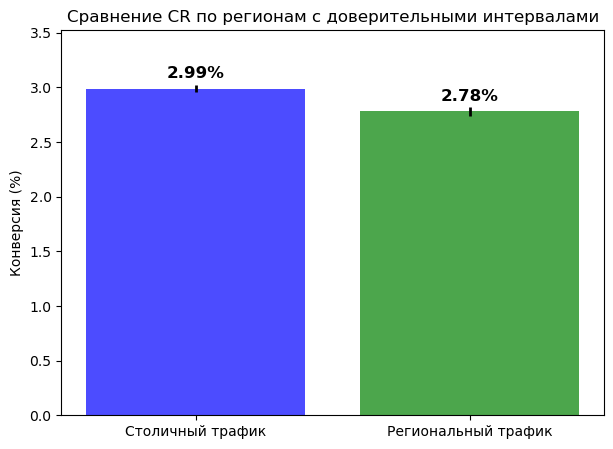

In [60]:
# Данные
regions = ["Столичный трафик", "Региональный трафик"]
cr_values = [2.99, 2.78]  # CR в %
n_values = [1029330, 702936]  # Количество пользователей
conv_values = [30742, 19572]  # Количество конверсий

# Расчет доверительных интервалов (95%)
z = 1.96  # Коэффициент для 95% доверительного интервала
se_values = [np.sqrt((cr / 100 * (1 - cr / 100)) / n) * 100 for cr, n in zip(cr_values, n_values)]
ci_values = [z * se for se in se_values]  # Длина доверительного интервала

# Определяем границы доверительных интервалов
lower_bounds = [cr - ci for cr, ci in zip(cr_values, ci_values)]
upper_bounds = [cr + ci for cr, ci in zip(cr_values, ci_values)]

# Построение графика
fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar(regions, cr_values, color=["blue", "green"], alpha=0.7)

# Добавляем вертикальные линии доверительных интервалов на весь график
for i in range(len(regions)):
    ax.vlines(x=i, ymin=lower_bounds[i], ymax=upper_bounds[i], color="black", linestyle="dashed", linewidth=2)

# Подписи процентов на столбцах
for i, v in enumerate(cr_values):
    ax.text(i, v + 0.1, f"{v:.2f}%", ha='center', fontsize=12, fontweight='bold')

# Настройки графика
ax.set_ylabel("Конверсия (%)")
ax.set_title("Сравнение CR по регионам с доверительными интервалами")
ax.set_ylim(0, max(upper_bounds) + 0.5)  # Увеличиваем пределы по оси Y

plt.show()

### ГИПОТЕЗА 3 опровергнута. 
Трафик из городов присутствия (Москва и область, Санкт-Петербург) отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события. Хоть разница и небольшая  всего на 7.5% (2.99% против 2.78%), масштаб выборки исключает случайное совпадения. Различие между CR в столичных регионах и остальных регионах также статистически значимо (p-value < 0.05)

## Из каких источников (кампаний, устройств, локаций) к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

In [63]:
# Смотрим статистику по интересующим данным
print(df.groupby(['geo_city']).size().sort_values(ascending=False))
print(df.groupby(['utm_source']).size().sort_values(ascending=False))
print(df.groupby(['utm_campaign']).size().sort_values(ascending=False))
print(df.groupby(['utm_medium']).size().sort_values(ascending=False))

geo_city
Moscow              6793943
Saint Petersburg    2365113
(not set)            596175
Yekaterinburg        328275
Krasnodar            293472
                     ...   
Balakliya                 1
Mannheim                  1
Trieste                   1
Maracaibo                 1
Mosonmagyarovar           1
Length: 2389, dtype: int64
utm_source
ZpYIoDJMcFzVoPFsHGJL    5151681
fDLlAcSmythWSCVMvqvL    3250788
kjsLglQLzykiRbcDiGcD    1771840
bByPQxmDaMXgpHeypKSM    1341305
BHcvLfOaCWvWTykYqHVe    1230668
                         ...   
cdPAGAvKeBGoqAkQBuGR          1
oBixMNCffOQtQcLCZfRN          1
OwOCmIeWDzEyCQjXdfQO          1
OOVxbzAjWMBOhTQWJgLx          1
DBLWVjTjVZuzWYWTaDfZ          1
Length: 280, dtype: int64
utm_campaign
LTuZkdKfxRGVceoWkVyg    5165509
LEoPHuyFvzoNfnzGgfcd    3177256
unknown                 2198384
gecBYcKZCPMcVYdSSzKP    1138529
FTjNLDyTrXaWYgZymFkV     750922
                         ...   
tWBQlsvNfHxRUjaPAfhd          1
cQRpDybanXRyHUvzJmgo          

In [67]:
# Создаем дф для каждой категории 
df_city = df.groupby('geo_city').agg(
    unique_sessions=('session_id', 'nunique'),  
    conversions=('is_target', lambda x: x.groupby(df.loc[x.index, 'session_id']).max().sum()) 
)

df_city['CR'] = (df_city['conversions'] / df_city['unique_sessions']) * 100  
df_city = df_city.sort_values(by='unique_sessions', ascending=False) 

print(df_city.head(20))


                  unique_sessions  conversions        CR
geo_city                                                
Moscow                     750928        23629  3.146640
Saint Petersburg           278402         7113  2.554939
(not set)                   73297         1588  2.166528
Yekaterinburg               33555          887  2.643421
Krasnodar                   30260         1081  3.572373
Kazan                       27689         1139  4.113547
Samara                      23433          727  3.102462
Nizhny Novgorod             20782          559  2.689828
Ufa                         20283          639  3.150422
Novosibirsk                 20115          509  2.530450
Krasnoyarsk                 15283          376  2.460250
Chelyabinsk                 14923          397  2.660323
Tula                        14774          438  2.964668
Rostov-on-Don               13064          397  3.038885
Voronezh                    12701          282  2.220298
Irkutsk                     125

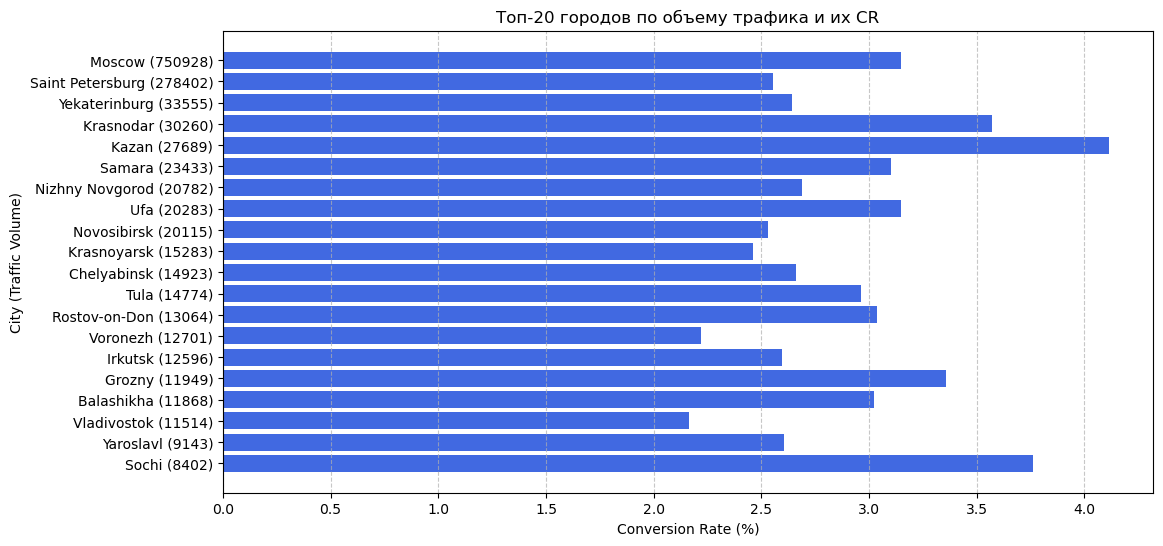

In [69]:
# Визуализируем 
df_filtered = df_city[df_city.index != "(not set)"]


top_cities = df_filtered.sort_values(by="unique_sessions", ascending=False).head(20)


city_labels = [f"{city} ({int(sessions)})" for city, sessions in zip(top_cities.index, top_cities["unique_sessions"])]

plt.figure(figsize=(12, 6))
plt.barh(city_labels[::-1], top_cities["CR"][::-1], color="royalblue")
plt.xlabel("Conversion Rate (%)")
plt.ylabel("City (Traffic Volume)")
plt.title("Топ-20 городов по объему трафика и их CR")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


In [71]:
df_channel = df.groupby('utm_source').agg(
    unique_sessions=('session_id', 'nunique'),
    conversions=('is_target', lambda x: x.groupby(df.loc[x.index, 'session_id']).max().sum()) 
)

df_channel['CR'] = (df_channel['conversions'] / df_channel['unique_sessions']) * 100  
df_channel = df_channel.sort_values(by='unique_sessions', ascending=False)  

print(df_channel.head(20))

                      unique_sessions  conversions        CR
utm_source                                                  
ZpYIoDJMcFzVoPFsHGJL           552555        15998  2.895277
fDLlAcSmythWSCVMvqvL           277060        10531  3.800982
kjsLglQLzykiRbcDiGcD           245178         6293  2.566707
MvfHsxITijuriZxsqZqt           175831         2249  1.279069
BHcvLfOaCWvWTykYqHVe           110963         3882  3.498463
bByPQxmDaMXgpHeypKSM            90356         5557  6.150117
QxAxdyPLuQMEcrdZWdWb            45267         1404  3.101597
aXQzDWsJuGXeBXexNHjc            29528         1827  6.187348
jaSOmLICuBzCFqHfBdRg            28288          401  1.417562
RmEBuqrriAfAVsLQQmhk            27412          139  0.507077
PlbkrSYoHuZBWfYjYnfw            20362           49  0.240644
vFcAhRxLfOWKhvxjELkx            18320           74  0.403930
hTjLvqNxGggkGnxSCaTm            14396          177  1.229508
gDBGzjFKYabGgSPZvrDH            13331            2  0.015003
fgymSoTvjKPEgaIJqsiH    

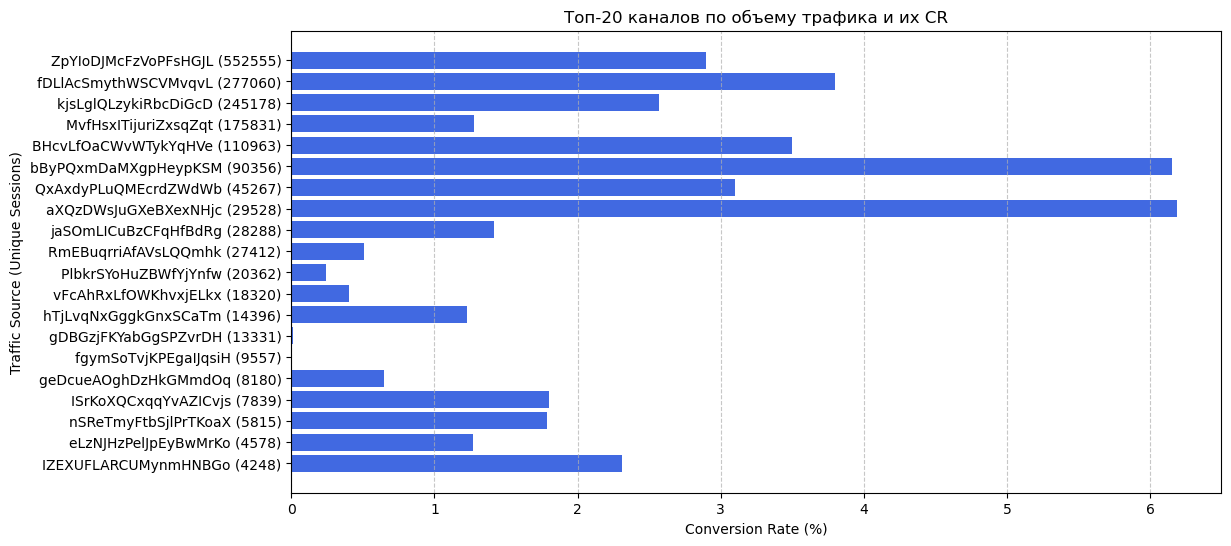

In [73]:
# Визуализируем 
top_channels = df_channel.head(20)

channel_labels = [f"{channel} ({int(sessions)})" for channel, sessions in zip(top_channels.index, top_channels["unique_sessions"])]

plt.figure(figsize=(12, 6))
plt.barh(channel_labels[::-1], top_channels["CR"][::-1], color="royalblue")
plt.xlabel("Conversion Rate (%)")
plt.ylabel("Traffic Source (Unique Sessions)")
plt.title("Топ-20 каналов по объему трафика и их CR")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

In [75]:
df_campaign = df.groupby('utm_campaign').agg(
    unique_sessions=('session_id', 'nunique'),  
    conversions=('is_target', lambda x: x.groupby(df.loc[x.index, 'session_id']).max().sum())  
)

df_campaign['CR'] = (df_campaign['conversions'] / df_campaign['unique_sessions']) * 100 
df_campaign = df_campaign.sort_values(by='unique_sessions', ascending=False) 

print(df_campaign.head(20))


                      unique_sessions  conversions        CR
utm_campaign                                                
LTuZkdKfxRGVceoWkVyg           422992        19006  4.493229
LEoPHuyFvzoNfnzGgfcd           321286         9348  2.909557
FTjNLDyTrXaWYgZymFkV           234950         2447  1.041498
unknown                        195287         7174  3.673568
gecBYcKZCPMcVYdSSzKP           133247         4545  3.410959
XHNUiSKKGTEpSAlaVMFQ            23750          401  1.688421
sbJRYgVfvcnqKJNDDYIr            19942          575  2.883362
okTXSMadDkjvntEHzIjp            18405           77  0.418365
LwJZxKuWmvOhPsaCeRjG            16846          285  1.691796
SgIUDYUKnyWHVowUOqid            15784          373  2.363153
RoDitORHdzGfGhNCyEMy            15063          204  1.354312
bxOTvPtyGSdUrbwoXCPO            14987          120  0.800694
TmThBvoCcwkCZZUWACYq            14878          123  0.826724
zxoiLxhuSIFrCeTLQVWZ            12234          270  2.206964
bJJuEXRheRIxXEaYIXqM    

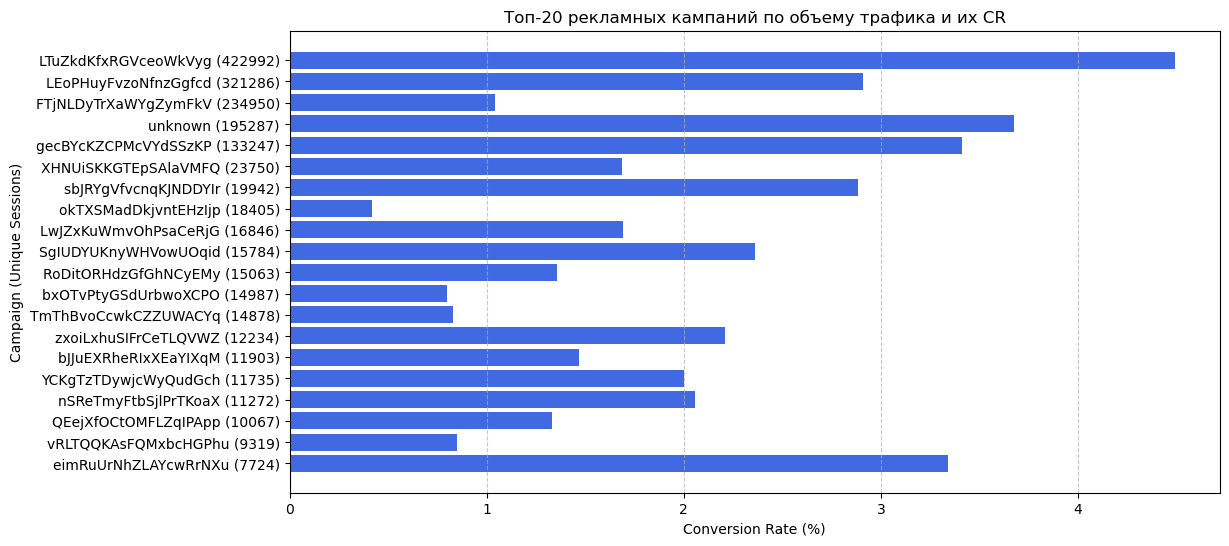

In [77]:
top_campaigns = df_campaign.head(20)

campaign_labels = [f"{campaign} ({int(sessions)})" for campaign, sessions in zip(top_campaigns.index, top_campaigns["unique_sessions"])]

plt.figure(figsize=(12, 6))
plt.barh(campaign_labels[::-1], top_campaigns["CR"][::-1], color="royalblue")
plt.xlabel("Conversion Rate (%)")
plt.ylabel("Campaign (Unique Sessions)")
plt.title("Топ-20 рекламных кампаний по объему трафика и их CR")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


In [79]:
df_involvement = df.groupby('utm_medium').agg(
    unique_sessions=('session_id', 'nunique'),
    conversions=('is_target', lambda x: x.groupby(df.loc[x.index, 'session_id']).max().sum())  

df_involvement['CR'] = (df_involvement['conversions'] / df_involvement['unique_sessions']) * 100 
df_involvement = df_involvement.sort_values(by='unique_sessions', ascending=False)  

print(df_involvement.head(20))


                 unique_sessions  conversions        CR
utm_medium                                             
banner                    525206        15107  2.876395
cpc                       399395         9529  2.385859
(none)                    277060        10531  3.800982
cpm                       229791         2519  1.096214
referral                  136851         8181  5.978035
organic                    55009         2100  3.817557
email                      28287          401  1.417612
push                       27710          840  3.031397
stories                    10472          126  1.203209
cpv                         7815          115  1.471529
blogger_channel             7731          162  2.095460
smartbanner                 6501          179  2.753423
blogger_stories             4226           35  0.828206
tg                          3920           51  1.301020
cpa                         3266          131  4.011023
post                        2227           54  2

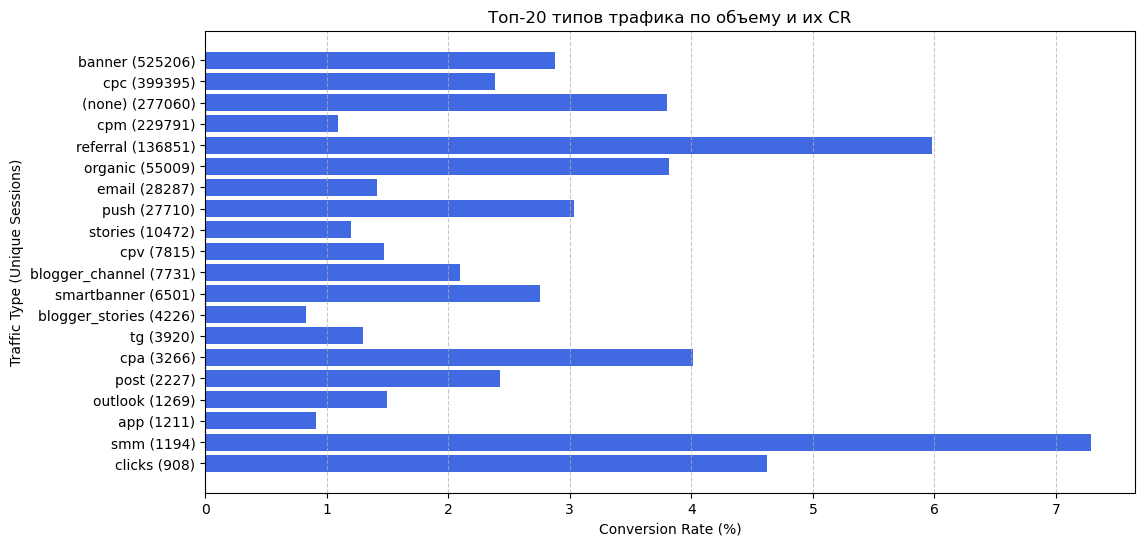

In [81]:
top_mediums = df_involvement.head(20)

medium_labels = [f"{medium} ({int(sessions)})" for medium, sessions in zip(top_mediums.index, top_mediums["unique_sessions"])]

plt.figure(figsize=(12, 6))
plt.barh(medium_labels[::-1], top_mediums["CR"][::-1], color="royalblue")
plt.xlabel("Conversion Rate (%)")
plt.ylabel("Traffic Type (Unique Sessions)")
plt.title("Топ-20 типов трафика по объему и их CR")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


### ОТВЕТ: 
С точки зрения городов, наибольший трафик идет из Москвы, СПБ и Екатеринбурга, по CR лучшие показатели в Казани, Сочи, Краснодаре. 
Каналы с наибольшим объемом - pYIoDJMcFzVoPFsHGJL, fDLlAcSmythWSCVMvqvL, kjsLglQLzykiRbcDiGcD. По CR себя хорошо показал bByPQxmDaMXgpHeypKSM. Каналы с очень низким CR RmEBuqrriAfAVsLQQmhk, PlbkrSYoHuZBWfYjYnfw, vFcAhRxLfOWKhvxjELkx, требуют внимательного изучения. 
По кампаниям: хороший объем имеют LTuZkdKfxRGVceoWkVyg (а также высокий CR), LEoPHuyFvzoNfnzGgfcd,FTjNLDyTrXaWYgZymFkV. У последнего очень низкий CR. 
трафик с баннерной рекламы наибольший, но CR меньше 3%. Рекламные показы по модели CPM не эффективны. Хорошие показатели у referral и SMM.
Вывод. Если цель – увеличить конверсии, стоит перераспределить бюджет на SMM, реферальные программы и органический трафик.

## Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?

In [7]:
# Изучаем ссылки
for i in range(50): print(df.hit_page_path[i])

podpiska.sberauto.com/
podpiska.sberauto.com/
podpiska.sberauto.com/
sberauto.com/cars?utm_source_initial=sbol&utm_medium_initial=banner&utm_campaign_initial=LEoPHuyFvzoNfnzGgfcd&utm_content_initial=vCIpmpaGBnIQhyYNkXqp&city=1&rental_page=rental_only&rental_car=rental_only&city=18
sberauto.com/cars?utm_source_initial=sbol&utm_medium_initial=banner&utm_campaign_initial=LEoPHuyFvzoNfnzGgfcd&utm_content_initial=vCIpmpaGBnIQhyYNkXqp&city=1&rental_page=rental_only&rental_car=rental_only&city=18
sberauto.com/cars?utm_source_initial=sbol&utm_medium_initial=banner&utm_campaign_initial=LEoPHuyFvzoNfnzGgfcd&utm_content_initial=vCIpmpaGBnIQhyYNkXqp&city=1&rental_page=rental_only&rental_car=rental_only&city=18
podpiska.sberauto.com/
sberauto.com/cars?utm_source_initial=sbol&utm_medium_initial=banner&utm_campaign_initial=LEoPHuyFvzoNfnzGgfcd&utm_content_initial=vCIpmpaGBnIQhyYNkXqp&city=1&rental_page=rental_only&rental_car=rental_only&city=18
sberauto.com/cars?utm_source_initial=sbol&utm_medium_ini

In [9]:
# Добавляем новый признак
import re

# Функция для извлечения нужной части ссылки
def extract_car_id(link):
    match = re.search(r"cars/([^?]+)", link)
    if match:
        return match.group(1)
    return None


df["car_id"] = df["hit_page_path"].apply(extract_car_id)

# Сохраняем результат в новый CSV
csv_filename = "car_ids.csv"
df.to_csv(csv_filename, index=False)

print(f"Файл сохранен как {csv_filename}")
print(df.head())


Файл сохранен как car_ids.csv
   Unnamed: 0                                 session_id     client_id  \
0           0  9055434745589932991.1637753792.1637753792  2.108383e+09   
1           1  9055434745589932991.1637753792.1637753792  2.108383e+09   
2           2   905544597018549464.1636867290.1636867290  2.108385e+08   
3           3  9055446045651783499.1640648526.1640648526  2.108385e+09   
4           4  9055446045651783499.1640648526.1640648526  2.108385e+09   

  visit_date visit_time  visit_number            utm_source utm_medium  \
0 2021-11-24   14:36:32             1  ZpYIoDJMcFzVoPFsHGJL     banner   
1 2021-11-24   14:36:32             1  ZpYIoDJMcFzVoPFsHGJL     banner   
2 2021-11-14   08:21:30             1  MvfHsxITijuriZxsqZqt        cpm   
3 2021-12-28   02:42:06             1  ZpYIoDJMcFzVoPFsHGJL     banner   
4 2021-12-28   02:42:06             1  ZpYIoDJMcFzVoPFsHGJL     banner   

           utm_campaign         utm_adcontent  ... geo_country     geo_city  \
0

In [14]:
df_car = df.groupby('car_id').agg(
    unique_sessions=('session_id', 'nunique'),  # Количество уникальных сеансов
    conversions=('is_target', lambda x: x.groupby(df.loc[x.index, 'session_id']).max().sum())
)

df_car['CR'] = (df_car['conversions'] / df_car['unique_sessions']) * 100 
df_car = df_car.sort_values(by='unique_sessions', ascending=False) 

print(df_car.head(20))

                                     unique_sessions  conversions        CR
car_id                                                                     
all/skoda/rapid/bf24b977                       56663         2614  4.613240
bf24b977                                       55771         3143  5.635545
f28947a1                                       49629         3325  6.699712
all/lada-vaz/vesta/2fc745ed                    49124         2398  4.881524
all/volkswagen/polo/e994838f                   40916         2053  5.017597
2fc745ed                                       35694         1300  3.642069
bfc21661                                       35159          814  2.315197
e994838f                                       34789         2112  6.070884
all/skoda/karoq/94b3d18e                       25470          611  2.398901
0208cd2b                                       24733          939  3.796547
6afb1543                                       23139          867  3.746921
7a3f9330    

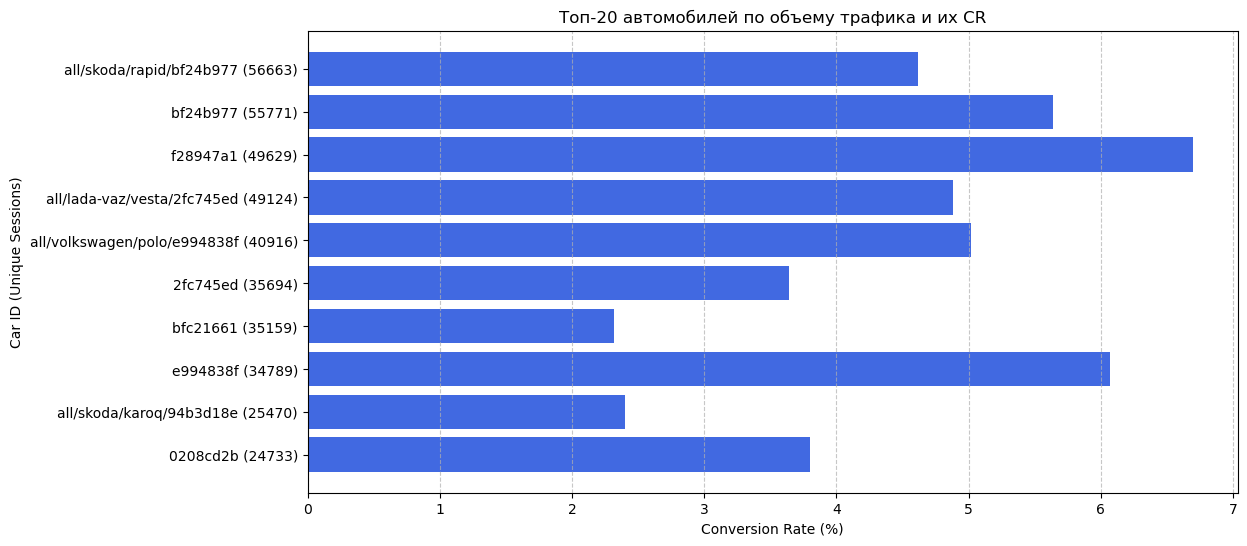

In [16]:
# Берем топ-20 автомобилей по объему трафика
top_cars = df_car.head(10)

# Формируем подписи (ID автомобиля + кол-во сессий)
car_labels = [f"{car} ({int(sessions)})" for car, sessions in zip(top_cars.index, top_cars["unique_sessions"])]

# Строим горизонтальный барчарт
plt.figure(figsize=(12, 6))
plt.barh(car_labels[::-1], top_cars["CR"][::-1], color="royalblue")
plt.xlabel("Conversion Rate (%)")
plt.ylabel("Car ID (Unique Sessions)")
plt.title("Топ-20 автомобилей по объему трафика и их CR")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


### ОТВЕТ:
Наибольшим спросом среди автомобилей пользуются Skoda Rapid (56663 визита, 2614 целевых событий, CR 4.61%), Lada Vesta (49124 визита, 2398 целевых событий, CR 4.88%) и Volkswagen Polo (40916 визитов, 2053 целевых событий, CR 5.02%). Также высокой популярностью обладают Toyota Camry (49629 визитов, 3325 целевых событий, CR 6.70%) и Skoda Karoq (25470 визитов, 611 целевых событий, CR 2.40%).

Если говорить о конверсии, то Toyota Camry (f28947a1) показывает лучший показатель CR — 6.70%, что говорит о высокой заинтересованности пользователей в данном автомобиле. Volkswagen Polo (e994838f) также демонстрирует хорошую конверсию в 6.07%. В то же время Skoda Rapid (bf24b977) с 5.64% и Lada Vesta (2fc745ed) с 3.64% также входят в число лидеров, но уступают Toyota и Volkswagen.

Вывод: Toyota Camry имеет самый высокий CR, что говорит о том, что пользователи, интересующиеся этим автомобилем, чаще совершают целевые действия. Однако по абсолютному количеству визитов и целевых событий лидируют Skoda Rapid и Lada Vesta, что указывает на их высокую популярность среди посетителей.

## Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

In [101]:
# Изучаем
df.utm_source.nunique()

280

In [103]:
df_soc = df.groupby('utm_source').agg(
    unique_sessions=('session_id', 'nunique'),  # Количество уникальных сеансов
    conversions=('is_target', lambda x: x.groupby(df.loc[x.index, 'session_id']).max().sum()) 
)

df_soc['CR'] = (df_soc['conversions'] / df_soc['unique_sessions']) * 100  
df_soc = df_soc.sort_values(by='unique_sessions', ascending=False) 

print(df_soc.head(20))

                      unique_sessions  conversions        CR
utm_source                                                  
ZpYIoDJMcFzVoPFsHGJL           552555        15998  2.895277
fDLlAcSmythWSCVMvqvL           277060        10531  3.800982
kjsLglQLzykiRbcDiGcD           245178         6293  2.566707
MvfHsxITijuriZxsqZqt           175831         2249  1.279069
BHcvLfOaCWvWTykYqHVe           110963         3882  3.498463
bByPQxmDaMXgpHeypKSM            90356         5557  6.150117
QxAxdyPLuQMEcrdZWdWb            45267         1404  3.101597
aXQzDWsJuGXeBXexNHjc            29528         1827  6.187348
jaSOmLICuBzCFqHfBdRg            28288          401  1.417562
RmEBuqrriAfAVsLQQmhk            27412          139  0.507077
PlbkrSYoHuZBWfYjYnfw            20362           49  0.240644
vFcAhRxLfOWKhvxjELkx            18320           74  0.403930
hTjLvqNxGggkGnxSCaTm            14396          177  1.229508
gDBGzjFKYabGgSPZvrDH            13331            2  0.015003
fgymSoTvjKPEgaIJqsiH    

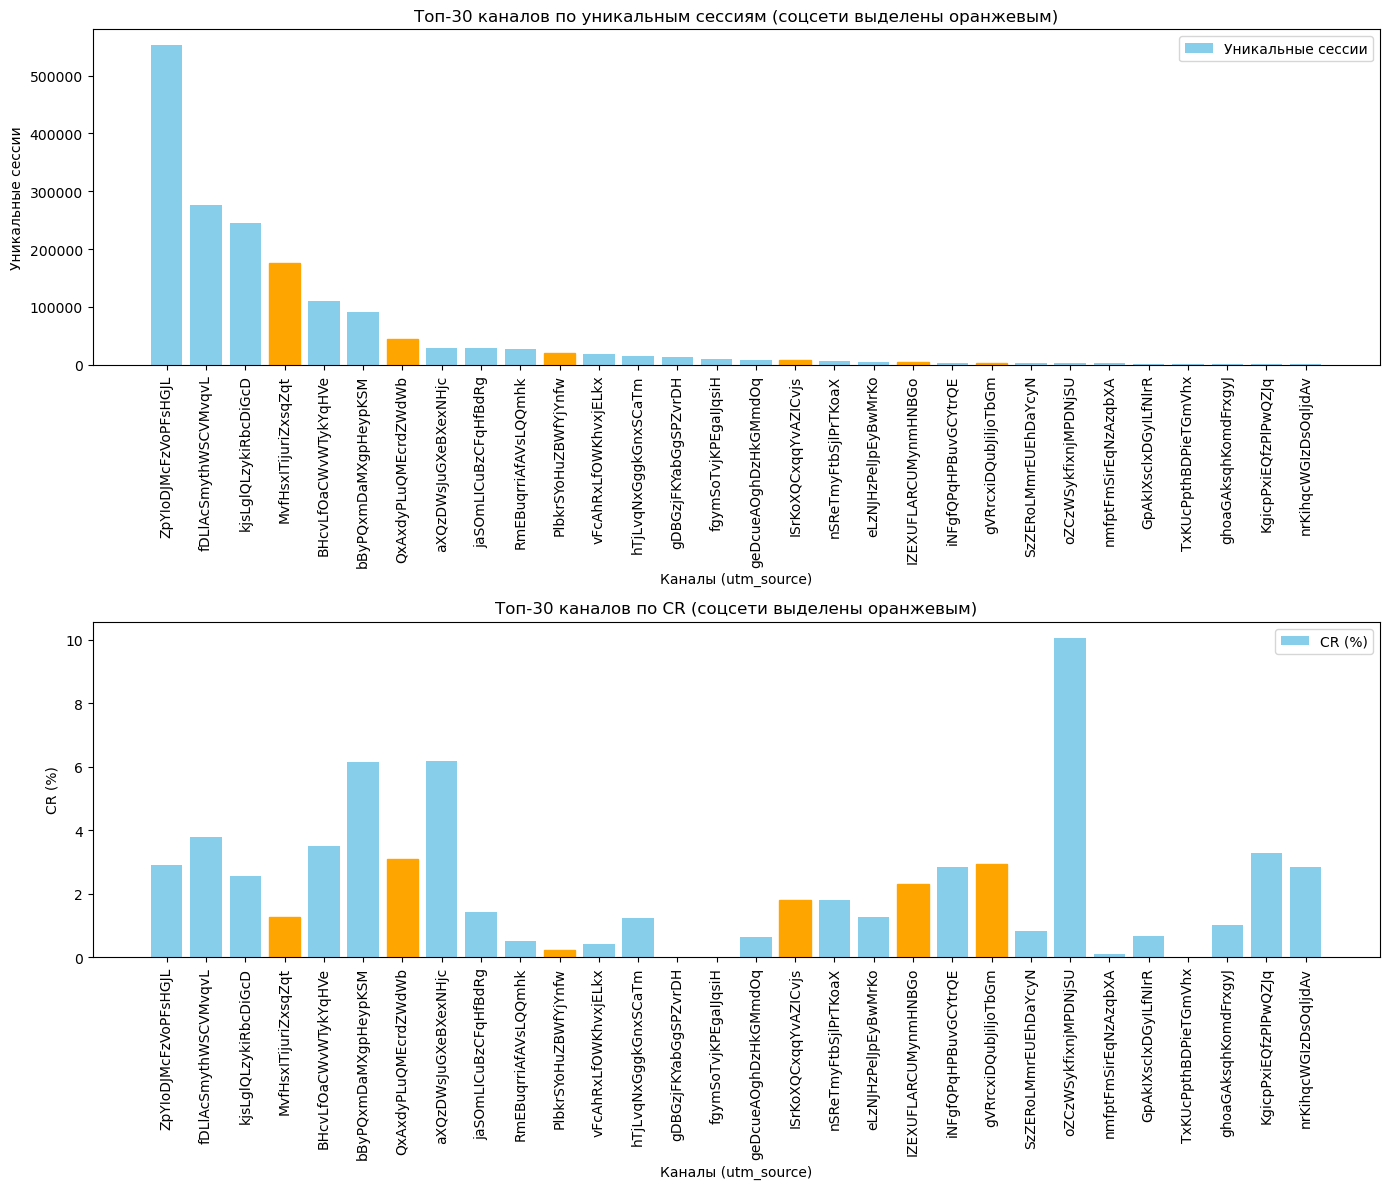

In [113]:
# Группировка данных
df_soc = df.groupby('utm_source').agg(
    unique_sessions=('session_id', 'nunique'),  
    conversions=('is_target', lambda x: x.groupby(df.loc[x.index, 'session_id']).max().sum())  
)

df_soc['CR'] = (df_soc['conversions'] / df_soc['unique_sessions']) * 100  
df_soc = df_soc.sort_values(by='unique_sessions', ascending=False)  


social_sources = [
    'QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
    'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm'
]


top_30 = df_soc.head(30)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# График 1: Уникальные сессии
bars_sessions = ax1.bar(top_30.index, top_30['unique_sessions'], color='skyblue', label='Уникальные сессии')


for i, bar in enumerate(bars_sessions):
    if top_30.index[i] in social_sources:
        bar.set_color('orange')

ax1.set_xlabel('Каналы (utm_source)')
ax1.set_ylabel('Уникальные сессии')
ax1.set_title('Топ-30 каналов по уникальным сессиям (соцсети выделены оранжевым)')
ax1.tick_params(axis='x', rotation=90)
ax1.legend()

# График 2: CR (Conversion Rate)
bars_cr = ax2.bar(top_30.index, top_30['CR'], color='skyblue', label='CR (%)')


for i, bar in enumerate(bars_cr):
    if top_30.index[i] in social_sources:
        bar.set_color('orange')

ax2.set_xlabel('Каналы (utm_source)')
ax2.set_ylabel('CR (%)')
ax2.set_title('Топ-30 каналов по CR (соцсети выделены оранжевым)')
ax2.tick_params(axis='x', rotation=90)
ax2.legend()

plt.tight_layout()

plt.show()


### ОТВЕТ:
По графикам видно, что трафик из соцсетей идет, но имеет низкий CR. Среди рекламных источников наибольший трафик дает MvfHsxITijuriZxsqZqt с 175831 визитами, но его конверсия всего 1.28%, что ниже среднего. QxAxdyPLuQMEcrdZWdWb показывает лучшую конверсию среди крупных источников — 3.10% при 45267 визитах. ISrKoXQCxqqYvAZICvjs (7839 визитов, 1.80% CR) и IZEXUFLARCUMynmHNBGo (4248 визитов, 2.31% CR) демонстрируют среднюю конверсию, а PlbkrSYoHuZBWfYjYnfw с 20362 визитами и CR 0.24% выглядит слабым.

Вывод: увеличение рекламного бюджета в соцсетях стоит рассматривать избирательно. QxAxdyPLuQMEcrdZWdWb показывает хороший баланс между трафиком и конверсией, а IZEXUFLARCUMynmHNBGo перспективен, но мал по объему. MvfHsxITijuriZxsqZqt привлекает много пользователей, но с низким CR, что может указывать на нецелевой трафик. Усиление рекламы в эффективных каналах и перераспределение бюджета от слабых источников может улучшить общую конверсию.